In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time

### without complex numbers of python

In [50]:
def calc_mand(resolution, precision):
    x = -0.65 #place on grid
    y = 0     #place on grid
    scale = 3.4

    minX = x - scale / 2
    minY = y - scale / 2

    out_matrix = np.zeros((resolution, resolution))

    for row in range(resolution):
        for col in range(resolution):
            x = minX + col * scale / resolution
            y = minY + row * scale / resolution
            oldX = x
            oldY = y
            for i in range(precision + 1):
                real = x*x - y*y #real component of z^2
                imag = 2 * x * y #imaginary component of z^2
                x = real + oldX #real component of new z
                y = imag + oldY #imaginary component of new z
                if x*x + y*y > 4:
                    break

            out_matrix[col,row] = i

    return out_matrix

time: 1.2420122623443604


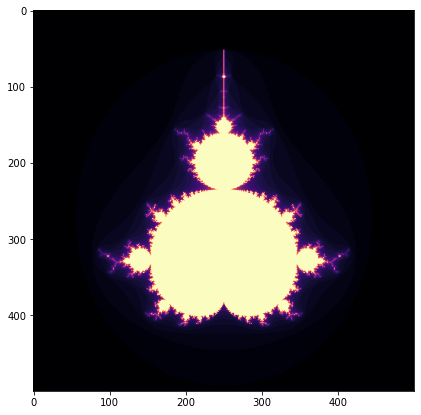

In [51]:
t1 = time.time()
md_py = calc_mand(500, 50)
print ("time:", time.time() - t1)
plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(md_py, cmap='magma')

### with complex numbers of python

In [52]:
def calc_mand2(resolution, precision):
    x = -.05 #place on grid
    y = 0     #place on grid
    scale = 5

    minX = x - scale / 2
    minY = y - scale / 2

    out_matrix = np.zeros((resolution, resolution))

    for row in range(resolution):
        for col in range(resolution):
            z = minX + col * scale / resolution + (minY + row * scale / resolution) * 1j
            firstZ = z
            for i in range(precision + 1):
                z = z ** 2 + firstZ
                if z.real * z.real + z.imag * z.imag > 4:
                    break

            out_matrix[col,row] = i

    return out_matrix

time: 0.9400243759155273


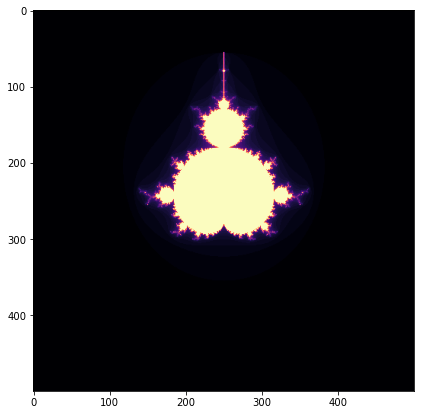

In [53]:
t1 = time.time()
mb_py = calc_mand2(500, 50)
print ("time:", time.time() - t1)
plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(mb_py, cmap='magma')

### with complex numbers of python and np.linspace

In [54]:
def calc_mand3(resolution, precision):
    rl = np.outer(np.ones((resolution,)), np.linspace(-2, 2, resolution))
    im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
    x =  rl + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]))

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            firstZ = x[row, col]
            for i in range(precision):
                x[row, col] = x[row, col] ** 2 + firstZ
                if x[row, col].real * x[row, col].real + x[row, col].imag * x[row, col].imag > 4:
                    break

            y[col,row] = i
    return y

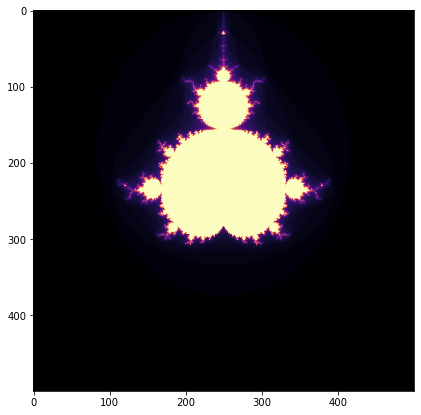

In [55]:
mb_py = calc_mand3(500, 50)
plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(mb_py, cmap='magma')